<a href="https://colab.research.google.com/github/TamaraTarasenko/Python-AZ-Python/blob/main/Python_AZ%E2%84%A2_Section_6_HW_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Movie Domestic % Gross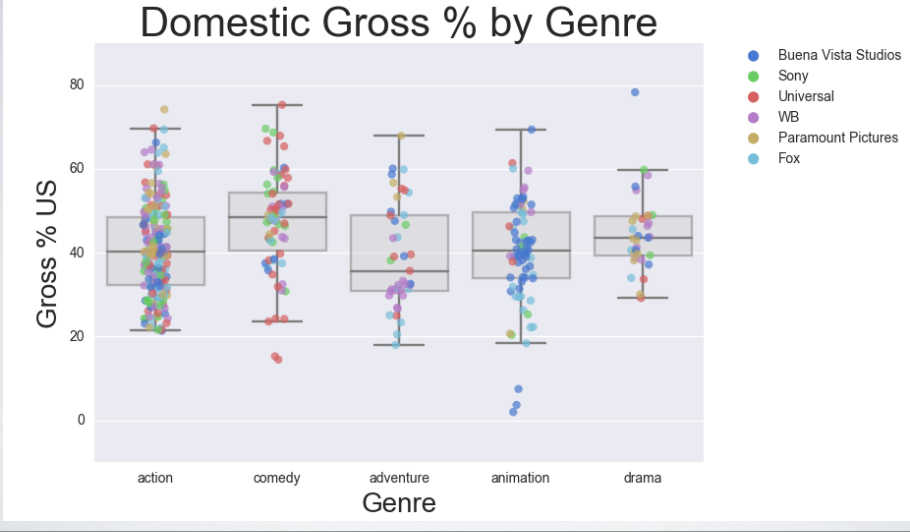

In [1]:
#The movie reviews website was very happy with your deliverable for the previous assignment
# and now they have a new request for you.
# The previous consultant had created a chart for them which is illustrated on the next slide.
# However the Python code used to create the diagram has since been lost and cannot be recovered.
# Your task is to come up with the code that will re-create the same chart making it look as close as possible
# to the original. A new dataset has been supplied

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 8,4  # another way to fix size

In [3]:
movie=pd.read_csv('/content/sample_data/P4-Section6-Homework-Dataset.csv', encoding='windows-1251')
movie.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [4]:
movie.columns


Index(['Day of Week', 'Director', 'Genre', 'Movie Title', 'Release Date',
       'Studio', 'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       'Gross % US'],
      dtype='object')

In [5]:
movie.columns=['Day_of', 'Director', 'Genre', 'Movie_Title', 'Release_Date','Studio', 'Adjusted_Gross_mill', 'Budget_mill', 'Gross', 'IMDb_Rating', 'MovieLens_Rating', 'Overseas_mill', 'Overseas', 'Profit_mill', 'Profit', 'Runtime', 'US_mill','Gross_US']

In [6]:
movie.columns

Index(['Day_of', 'Director', 'Genre', 'Movie_Title', 'Release_Date', 'Studio',
       'Adjusted_Gross_mill', 'Budget_mill', 'Gross', 'IMDb_Rating',
       'MovieLens_Rating', 'Overseas_mill', 'Overseas', 'Profit_mill',
       'Profit', 'Runtime', 'US_mill', 'Gross_US'],
      dtype='object')

In [7]:
movie.describe()

,Budget_mill,IMDb_Rating,MovieLens_Rating,Overseas,Profit,Runtime,US_mill,Gross_US
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


In [8]:
movie.Genre.unique()

array(['action', 'comedy', 'adventure', 'horror', 'animation',
       'biography', 'drama', 'musical', 'sci-fi', 'crime', 'romance',
       'fantasy', 'mystery', 'thriller', 'documentary'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'action'),
  Text(1, 0, 'comedy'),
  Text(2, 0, 'adventure'),
  Text(3, 0, 'horror'),
  Text(4, 0, 'animation'),
  Text(5, 0, 'biography'),
  Text(6, 0, 'drama'),
  Text(7, 0, 'musical'),
  Text(8, 0, 'sci-fi'),
  Text(9, 0, 'crime'),
  Text(10, 0, 'romance'),
  Text(11, 0, 'fantasy'),
  Text(12, 0, 'mystery'),
  Text(13, 0, 'thriller'),
  Text(14, 0, 'documentary')])

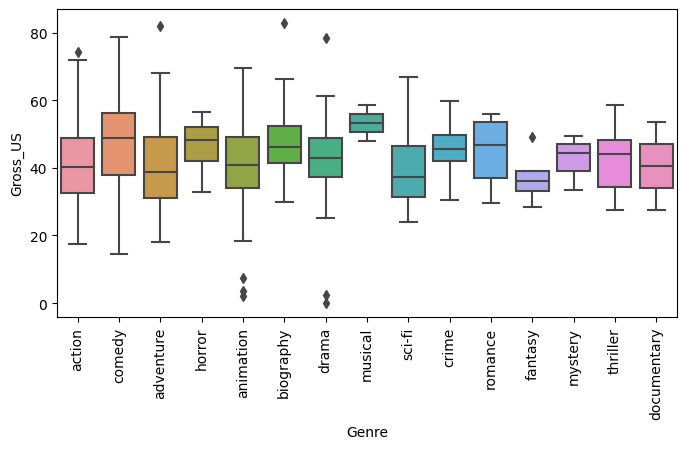

In [9]:
p =sns.boxplot(data=movie,x='Genre', y='Gross_US')
plt.xticks(rotation=90)

In [10]:
# I choose 'action'
movie_genre = movie[movie['Genre'] == 'action']
movie_genre.head()

,Day_of,Director,Genre,Movie_Title,Release_Date,Studio,Adjusted_Gross_mill,Budget_mill,Gross,IMDb_Rating,MovieLens_Rating,Overseas_mill,Overseas,Profit_mill,Profit,Runtime,US_mill,Gross_US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
5,Friday,David Ayer,action,Fury,17/10/2014,Sony,212.8,80.0,211.8,5.8,2.85,126,59.5,131.8,164.8,134,85.8,40.5


In [11]:
# I need to choose only 5 genre: 'action', 'comedy', 'adventure', 'animation', 'drama'
# choose specific values in one column ('Genre',where column_index = 1)
#chosen_values=['action', 'comedy',  'adventure', 'animation', 'drama' ]

chosen_values=['action', 'comedy', 'adventure', 'animation', 'drama']

selected_movie = movie[movie['Genre']. isin(chosen_values)]

selected_movie

,Day_of,Director,Genre,Movie_Title,Release_Date,Studio,Adjusted_Gross_mill,Budget_mill,Gross,IMDb_Rating,MovieLens_Rating,Overseas_mill,Overseas,Profit_mill,Profit,Runtime,US_mill,Gross_US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,Friday,Steven Spielberg,adventure,E.T.: The Extra-Terrestrial,11/06/1982,Universal,"1,953.90",10.5,792.9,7.9,3.76,357.8,45.1,782.4,7451.4,115,435.1,54.9
602,Tuesday,Richard Fleischer,adventure,Doctor Dolittle,19/12/1967,Fox,"2,096.80",70.5,294.5,5.3,3.01,150.3,51.0,224,317.7,152,144.2,49.0
604,Wednesday,George Lucas,action,Star Wars,25/05/1977,Fox,"3,042.80",11.0,775.4,8.7,4.19,314.4,40.5,764.4,6949.1,121,461.0,59.5
606,Wednesday,James Cameron,drama,Titanic,17/12/1997,Paramount Pictures,"3,240.10",200.0,"2,186.80",7.7,3.38,"1,528.10",69.9,"1,986.80",993.4,194,658.7,30.1


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'action'),
  Text(1, 0, 'comedy'),
  Text(2, 0, 'adventure'),
  Text(3, 0, 'animation'),
  Text(4, 0, 'drama')])

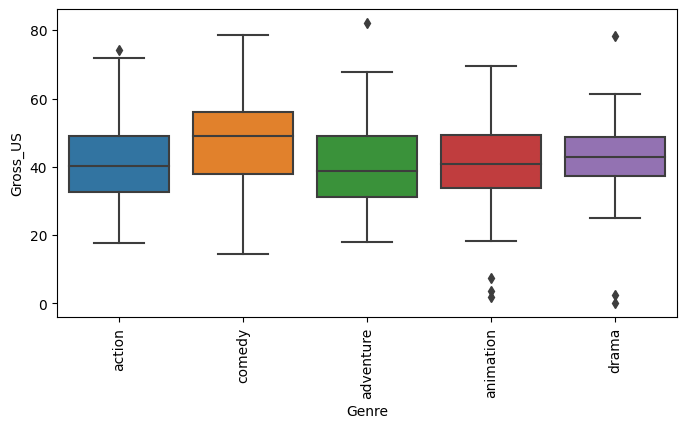

In [12]:
# bilding boxplot
p =sns.boxplot(data=selected_movie,x='Genre', y='Gross_US')
plt.xticks(rotation=90)

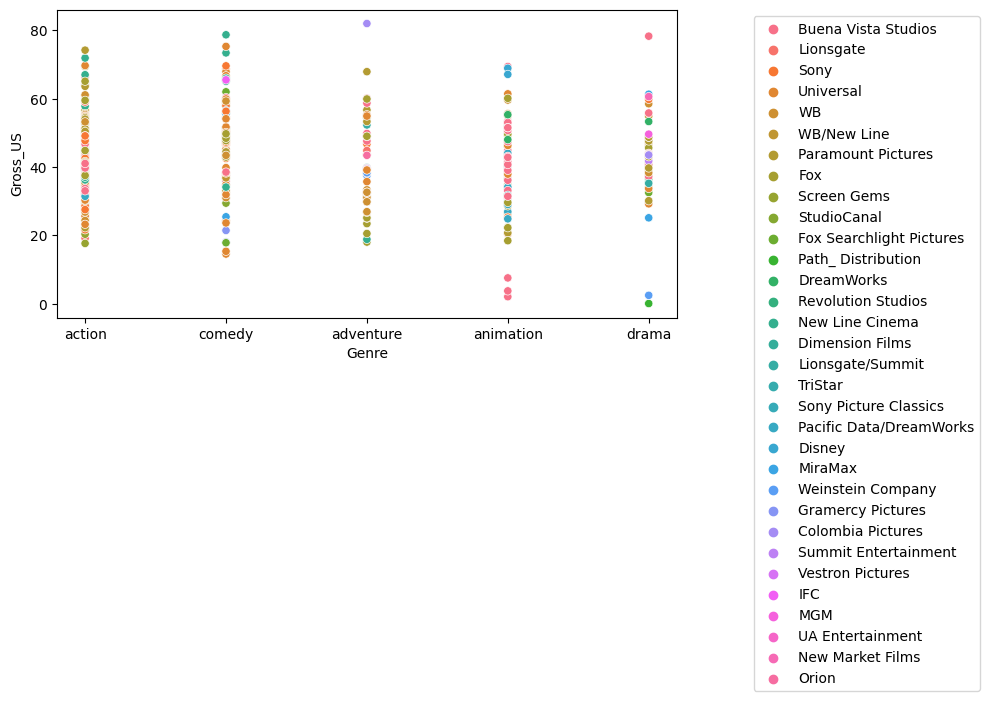

In [13]:
sns.scatterplot(x=selected_movie.Genre, y=selected_movie.Gross_US, hue=selected_movie.Studio)
plt.legend(bbox_to_anchor=(1.5,1), loc='upper right')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'action'),
  Text(1, 0, 'comedy'),
  Text(2, 0, 'adventure'),
  Text(3, 0, 'animation'),
  Text(4, 0, 'drama')])

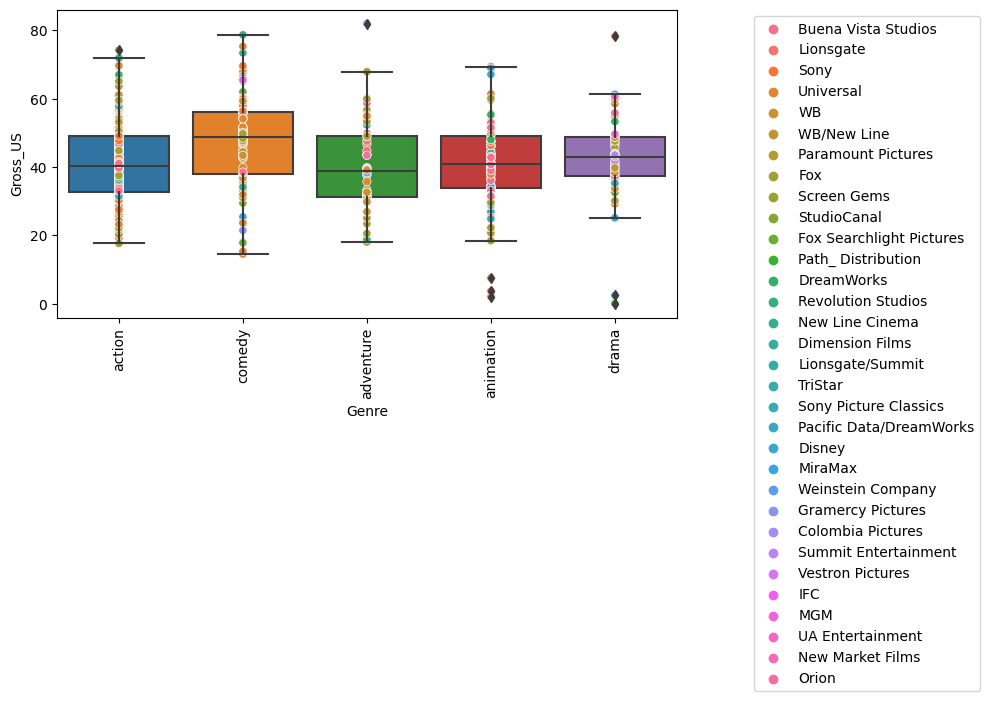

In [14]:
#attempt #1
sns.scatterplot(x=selected_movie.Genre, y=selected_movie.Gross_US, hue=selected_movie.Studio)
plt.legend(bbox_to_anchor=(1.5,1), loc='upper right')
p =sns.boxplot(data=selected_movie, x='Genre', y='Gross_US')
plt.xticks(rotation=90)


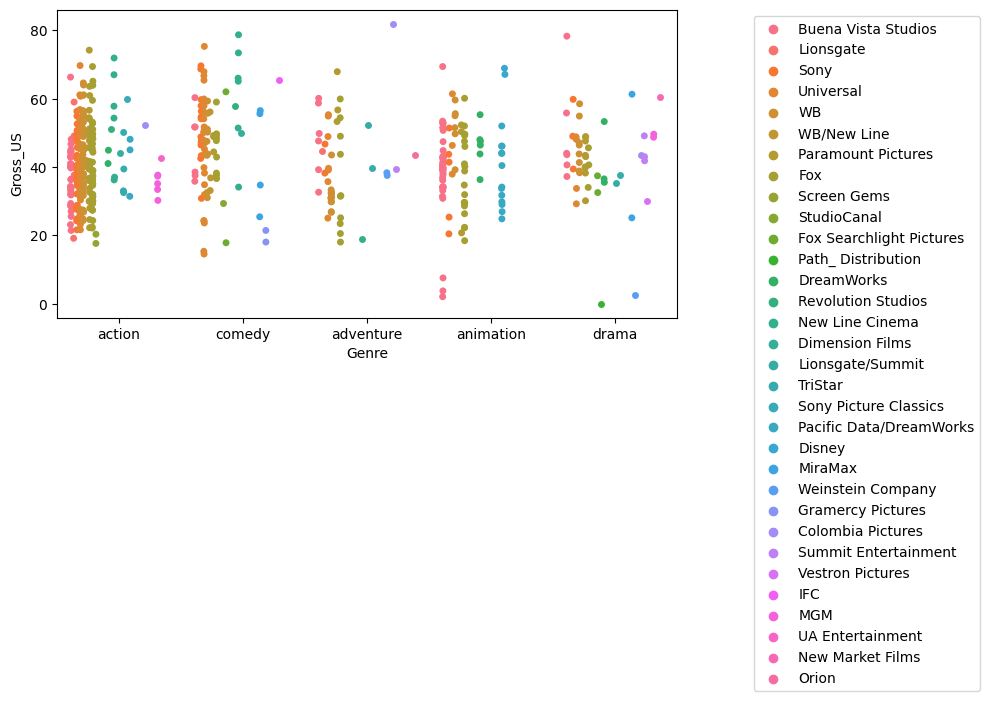

In [15]:
sns.stripplot(data=selected_movie, x='Genre', y='Gross_US', hue='Studio', jitter=True, dodge=True)
plt.legend(bbox_to_anchor=(1.5,1), loc='upper right')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'action'),
  Text(1, 0, 'comedy'),
  Text(2, 0, 'adventure'),
  Text(3, 0, 'animation'),
  Text(4, 0, 'drama')])

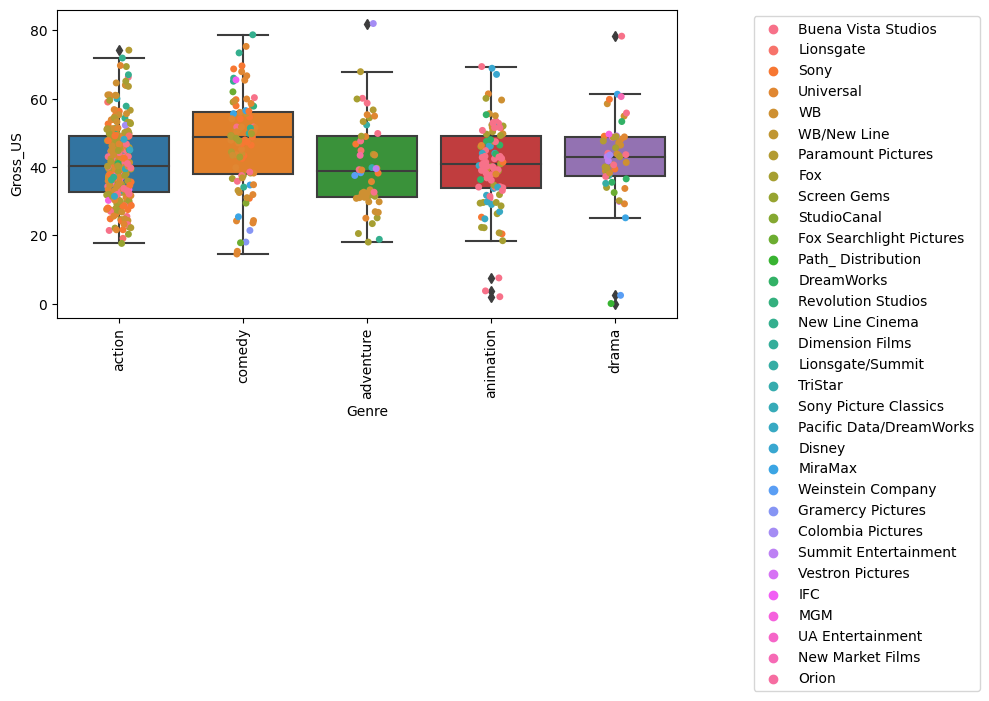

In [47]:
#attempt #2
sns.stripplot(data=selected_movie, x='Genre', y='Gross_US', hue='Studio', jitter=True)
plt.legend(bbox_to_anchor=(1.5,1), loc='upper right')
p =sns.boxplot(data=selected_movie,x='Genre', y='Gross_US')
plt.xticks(rotation=90)

In [17]:
#  I need choos only 6 Studio : 'Buena Vista Studios', 'Sony', 'Universal', 'WB', 'Paramount Pictures', 'Fox'
selected_movie.Studio.unique()

array(['Buena Vista Studios', 'Lionsgate', 'Sony', 'Universal', 'WB',
       'WB/New Line', 'Paramount Pictures', 'Fox', 'Screen Gems',
       'StudioCanal', 'Fox Searchlight Pictures', 'Path_ Distribution',
       'DreamWorks', 'Revolution Studios', 'New Line Cinema',
       'Dimension Films', 'Lionsgate/Summit', 'TriStar',
       'Sony Picture Classics', 'Pacific Data/DreamWorks', 'Disney',
       'MiraMax', 'Weinstein Company', 'Gramercy Pictures',
       'Colombia Pictures', 'Summit Entertainment', 'Vestron Pictures',
       'IFC', 'MGM', 'UA Entertainment', 'New Market Films', 'Orion'],
      dtype=object)

In [29]:
#  I need choos only 6 Studio : 'Buena Vista Studios', 'Sony', 'Universal', 'WB', 'Paramount Pictures', 'Fox'
# there are:
len(selected_movie.Studio.unique())

32

In [18]:
chosen_studio=['Buena Vista Studios', 'Sony', 'Universal', 'WB', 'Paramount Pictures', 'Fox']


In [19]:
# I need to choose only 5 studio: 'Buena Vista Studios', 'Sony', 'Universal', 'WB', 'Paramount Pictures', 'Fox'

#chosen_studio=['Buena Vista Studios', 'Sony', 'Universal', 'WB', 'Paramount Pictures', 'Fox']

chosen_studio=['Buena Vista Studios', 'Sony', 'Universal', 'WB', 'Paramount Pictures', 'Fox']

selected_movie_studio = selected_movie[selected_movie['Studio']. isin(chosen_studio)]

selected_movie_studio

,Day_of,Director,Genre,Movie_Title,Release_Date,Studio,Adjusted_Gross_mill,Budget_mill,Gross,IMDb_Rating,MovieLens_Rating,Overseas_mill,Overseas,Profit_mill,Profit,Runtime,US_mill,Gross_US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
5,Friday,David Ayer,action,Fury,17/10/2014,Sony,212.8,80.0,211.8,5.8,2.85,126,59.5,131.8,164.8,134,85.8,40.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Friday,Steven Spielberg,adventure,Jurassic Park,11/06/1993,Universal,"1,693.80",63.0,"1,029.20",8.1,3.66,626.7,60.9,966.2,1533.7,127,402.5,39.1
600,Friday,Steven Spielberg,adventure,E.T.: The Extra-Terrestrial,11/06/1982,Universal,"1,953.90",10.5,792.9,7.9,3.76,357.8,45.1,782.4,7451.4,115,435.1,54.9
602,Tuesday,Richard Fleischer,adventure,Doctor Dolittle,19/12/1967,Fox,"2,096.80",70.5,294.5,5.3,3.01,150.3,51.0,224,317.7,152,144.2,49.0
604,Wednesday,George Lucas,action,Star Wars,25/05/1977,Fox,"3,042.80",11.0,775.4,8.7,4.19,314.4,40.5,764.4,6949.1,121,461.0,59.5


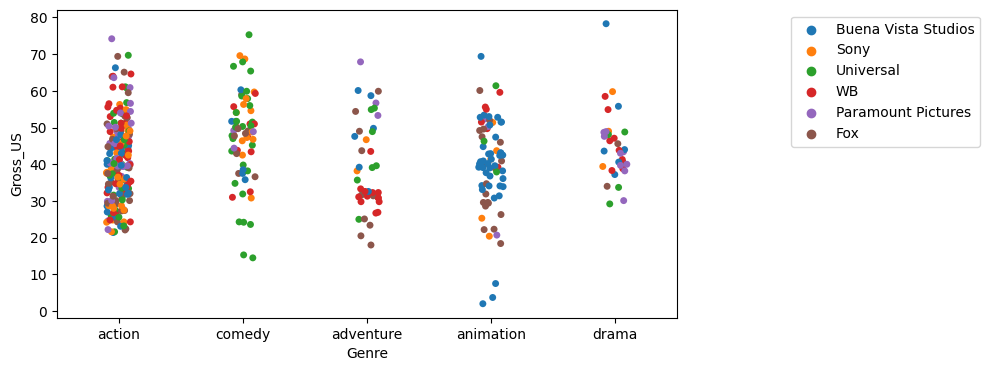

In [46]:
sns.stripplot(data=selected_movie_studio, x='Genre', y='Gross_US', hue='Studio', jitter=True)
plt.legend(bbox_to_anchor=(1.5,1), loc='upper right')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'action'),
  Text(1, 0, 'comedy'),
  Text(2, 0, 'adventure'),
  Text(3, 0, 'animation'),
  Text(4, 0, 'drama')])

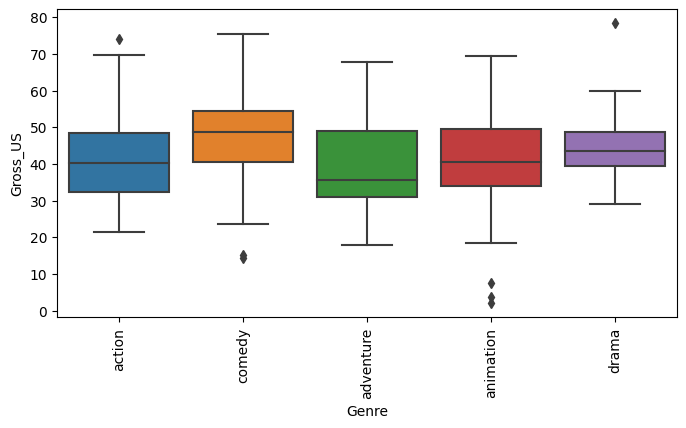

In [21]:
# bilding boxplot
p =sns.boxplot(data=selected_movie_studio, x='Genre', y='Gross_US')
plt.xticks(rotation=90)

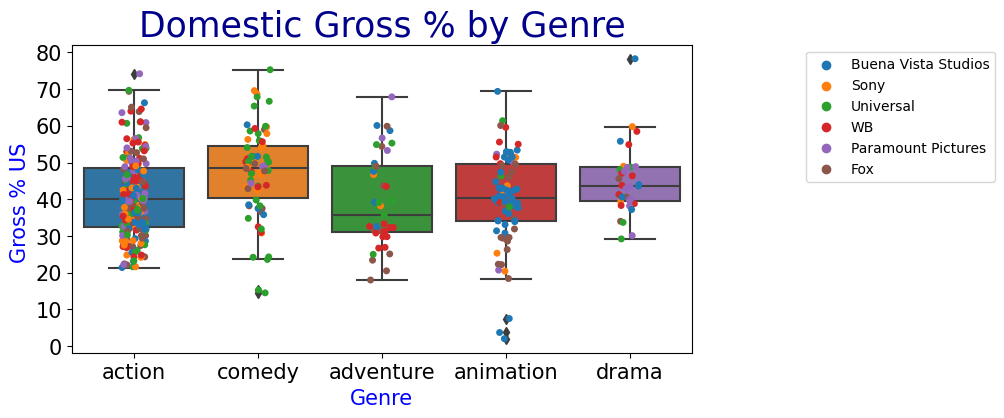

In [51]:
# #attempt #2.2
p =sns.boxplot(data=selected_movie_studio, x='Genre', y='Gross_US')
#plt.xticks(rotation=90)
sns.stripplot(data=selected_movie_studio, x='Genre', y='Gross_US', hue='Studio')
plt.title("Domestic Gross % by Genre", fontsize=25, color="DarkBlue")
plt.xlabel("Genre", fontsize=15, color="Blue")
plt.ylabel("Gross % US ", fontsize=15, color="Blue")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(bbox_to_anchor=(1.5,1), loc='upper right')


In [45]:
# I checked my result with the trainer's result
#ax=sns.boxplot( data=selected_movie_studio, x='Genre', y='Gross_US', orient='v', color='lightgray', showfliers=False )
#plt. setp(ax.artists, alpha=0.5)
#sns.stripplot(x='Genre', y='Gross_US', data=selected_movie_studio, jitter=True, size=6, linewidth=0, hue='Studio', alpha=0.7)
#plt.legend(bbox_to_anchor=(1.5,1), loc='upper right')

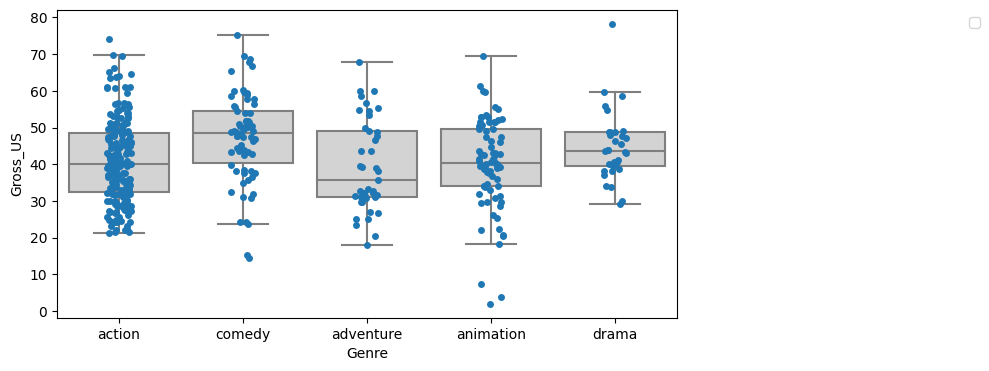

In [38]:
#ax=sns.boxplot( data=selected_movie_studio, x='Genre', y='Gross_US', orient='v', color='lightgray', showfliers=False )
#plt. setp(ax.artists, alpha=0.5)
#sns.stripplot(x='Genre', y='Gross_US', data=selected_movie_studio,jitter=True, size=6, linewidth=0, hue='Studio', alpha=0.7)
#plt.legend(bbox_to_anchor=(1.5,1), loc='upper right')

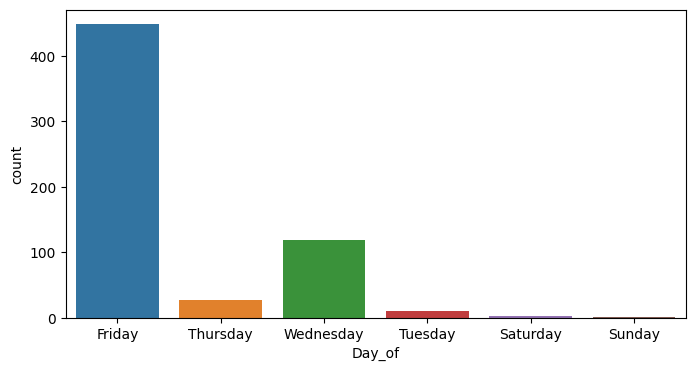

In [33]:
#extra task
d_off=sns.countplot(data = movie, x ='Day_of',)